In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import keras

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
print('training_images: ' + str(training_images.shape))
print('training_labels: ' + str(training_labels.shape))
print("We have total", len(training_images), "images for training")
print("with", len(training_labels), "labels for each image")

training_images: (60000, 28, 28)
training_labels: (60000,)
We have total 60000 images for training
with 60000 labels for each image


In [6]:
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))
print("We have taken", len(test_images), "images to test our model")
print("with", len(test_labels), "its labels for each image")

test_images:  (10000, 28, 28)
test_labels:  (10000,)
We have taken 10000 images to test our model
with 10000 its labels for each image


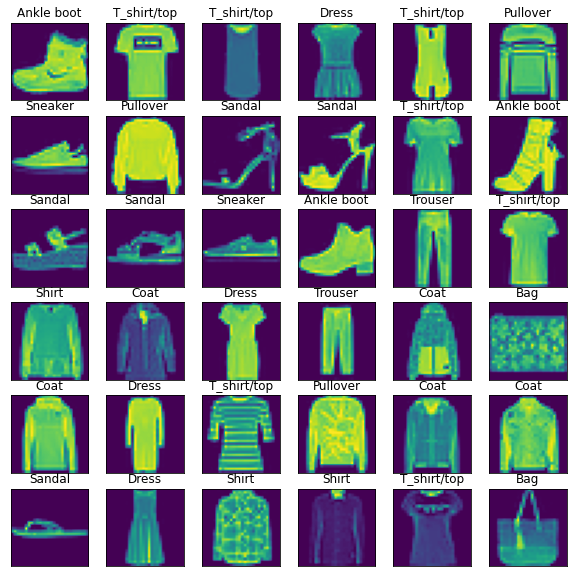

In [7]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i].reshape((28,28)))
    label_index = int(training_labels[i])
    plt.title(class_names[label_index])
plt.show()

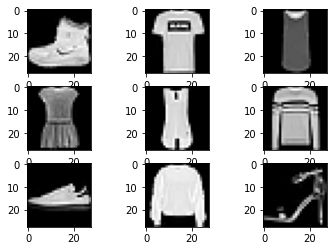

In [8]:
# Training Images

for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(training_images[i], cmap=plt.get_cmap('gray'))
plt.show()

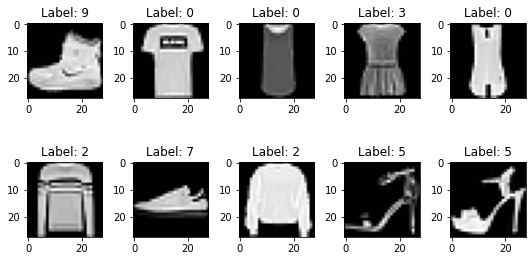

In [9]:
# Training Images with their labels

num = 10
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(training_images[i], cmap='gray')
    ax.set_title('Label: {}'.format(training_labels[i]))
plt.tight_layout()
plt.show()

In [10]:
training_images=training_images.reshape(60000, 28, 28, 1)  # CNN takes i/p in 3*3 format
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

6


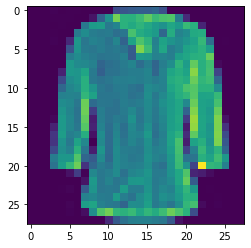

In [11]:
print(test_labels[4])
plt.imshow(test_images[4])

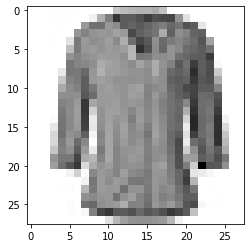

In [12]:
plt.imshow(test_images[4].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

### CNN Model consisting of: 2-Hidden layers, 1 flatten and 2 dense layer(1 for i/p and 1 for o/p) along with sigmoid and softmax AF

In [13]:
model = tf.keras.models.Sequential([# Convolution1
                                    tf.keras.layers.Conv2D(32, (3,3), activation='sigmoid', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Convolution2
                                    tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flattening the o/p
                                    tf.keras.layers.Flatten(),
                                    # 128 dense layers, and 10 output layers
                                    tf.keras.layers.Dense(128, activation='sigmoid'),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                    ])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## AdaGrad Optimizer with sparse categrical crossentropy loss function

In [15]:
optimizer = keras.optimizers.Adagrad(lr=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [16]:
history = model.fit(training_images, training_labels, batch_size=256, epochs=22, validation_split=.15)

Epoch 1/22
200/200 [==============================] - 32s 162ms/step - loss: 2.3094 - accuracy: 0.0998 - val_loss: 2.3069 - val_accuracy: 0.0969
Epoch 2/22
200/200 [==============================] - 31s 154ms/step - loss: 2.3036 - accuracy: 0.1016 - val_loss: 2.3063 - val_accuracy: 0.0999
Epoch 3/22
200/200 [==============================] - 32s 160ms/step - loss: 2.3028 - accuracy: 0.1039 - val_loss: 2.3030 - val_accuracy: 0.0999
Epoch 4/22
200/200 [==============================] - 32s 162ms/step - loss: 2.3020 - accuracy: 0.1060 - val_loss: 2.3026 - val_accuracy: 0.1033
Epoch 5/22
200/200 [==============================] - 32s 162ms/step - loss: 2.3011 - accuracy: 0.1079 - val_loss: 2.3005 - val_accuracy: 0.1648
Epoch 6/22
200/200 [==============================] - 37s 184ms/step - loss: 2.2988 - accuracy: 0.1117 - val_loss: 2.2994 - val_accuracy: 0.0969
Epoch 7/22
200/200 [==============================] - 31s 153ms/step - loss: 2.2967 - accuracy: 0.1197 - val_loss: 2.2986 - val_ac

In [18]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8074784874916077
Test accuracy: 0.7069000005722046


In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

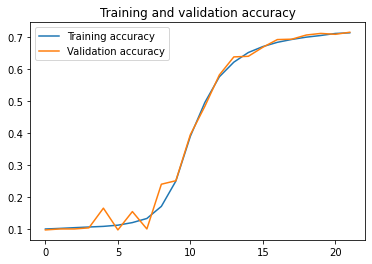

In [37]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

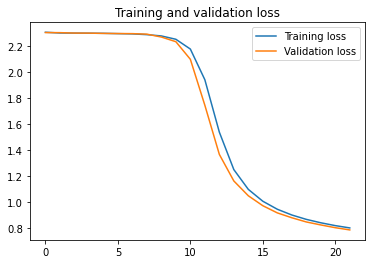

In [38]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

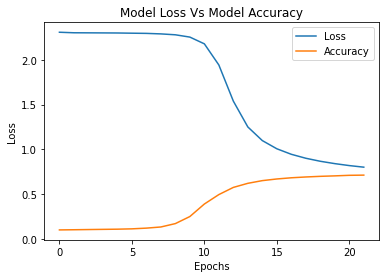

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss Vs Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Accuracy'])
plt.show()

In [44]:
predictions = model.predict(test_images)
print("Predicted Probabilities -\n",predictions[:4])
pred_labels = np.argmax(predictions,axis=1)
print("\nPredicted Class [Highest Prob] -",pred_labels[:4])

Predicted Probabilities -
 [[4.2151607e-04 3.0043388e-05 1.6328732e-03 1.2798613e-03 1.8710356e-03
  4.0421095e-01 1.9803154e-03 2.7663851e-01 2.8638639e-02 2.8329620e-01]
 [3.4550123e-02 2.8046436e-04 4.8145345e-01 6.6504916e-03 1.8178503e-01
  4.4192889e-04 2.3047215e-01 2.0326208e-04 6.2250208e-02 1.9128397e-03]
 [2.0678928e-02 8.7178546e-01 3.2212641e-03 7.9009071e-02 1.3069613e-02
  2.0088759e-04 1.1701395e-02 1.7935550e-04 7.3236028e-05 8.0801852e-05]
 [2.1727487e-02 8.1748319e-01 3.1660481e-03 1.3694131e-01 7.5428709e-03
  5.0694990e-04 1.2265791e-02 2.0639281e-04 8.4495441e-05 7.5530166e-05]]

Predicted Class [Highest Prob] - [5 2 1 1]


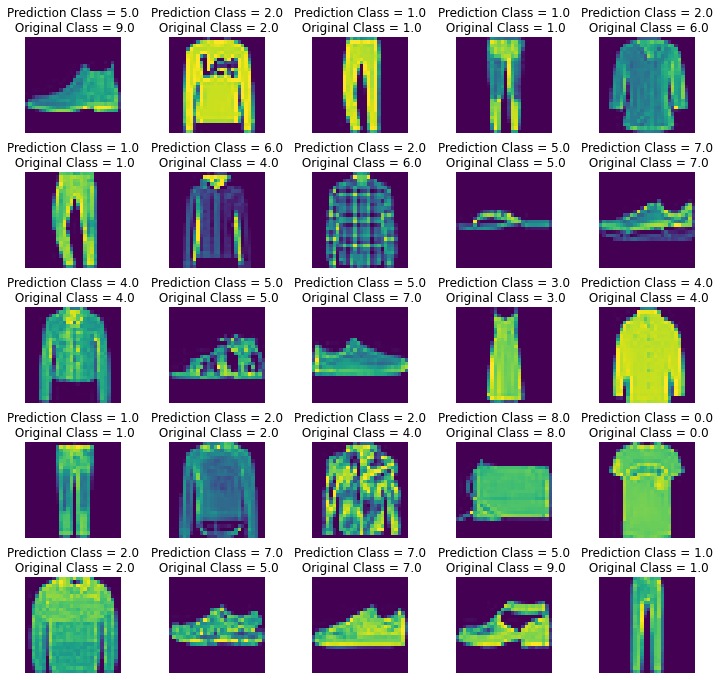

In [45]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(test_images[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {pred_labels[i]:0.1f}\n Original Class = {test_labels[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels) * 100

70.69